In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time 
import seaborn as sns
from scipy import stats
from scipy.stats import norm,skew

from scipy.stats import boxcox_normmax

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score,precision_recall_curve



from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso ,LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")


# Explortatory Data analysis

In [2]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# checking the shape
df.shape

(284807, 31)

In [4]:
# checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#checking the null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# checking distribution of numeric values in the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
#checking the class distribution of the target variable
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<Axes: ylabel='Class'>

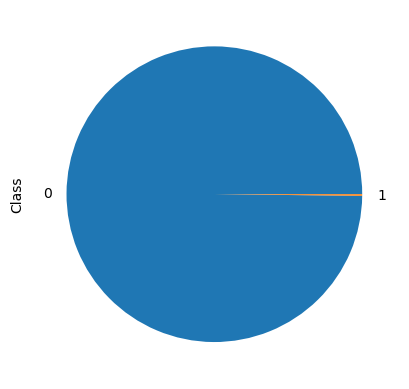

In [8]:
#checking the class distirbution of the target variables in percentages
print((df.groupby('Class')['Class'].count()/df['Class'].count())*100)
((df.groupby('Class')['Class'].count()/df['Class'].count())*100).plot.pie()

In [9]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


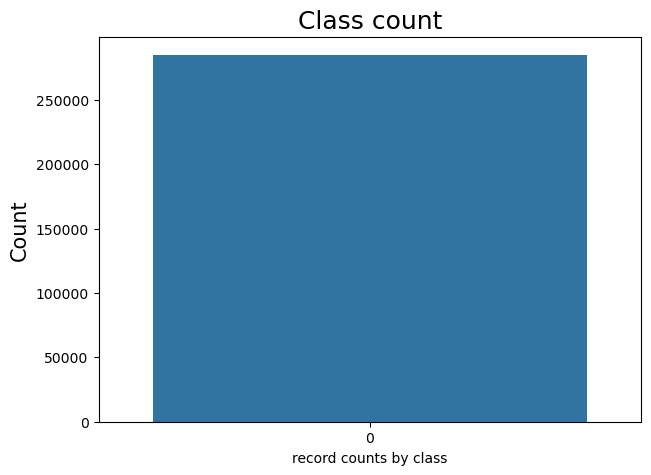

In [10]:
# create a bar plot for the number and percentage of fraudulent vs non-frauduent tranaction
plt.figure(figsize=(7,5))
sns.countplot(df['Class'])
plt.title("Class count",fontsize=18)
plt.xlabel("record counts by class",fontsize=10)
plt.ylabel("Count",fontsize=15)
plt.show()

In [11]:
# checking the correlation
corr=df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


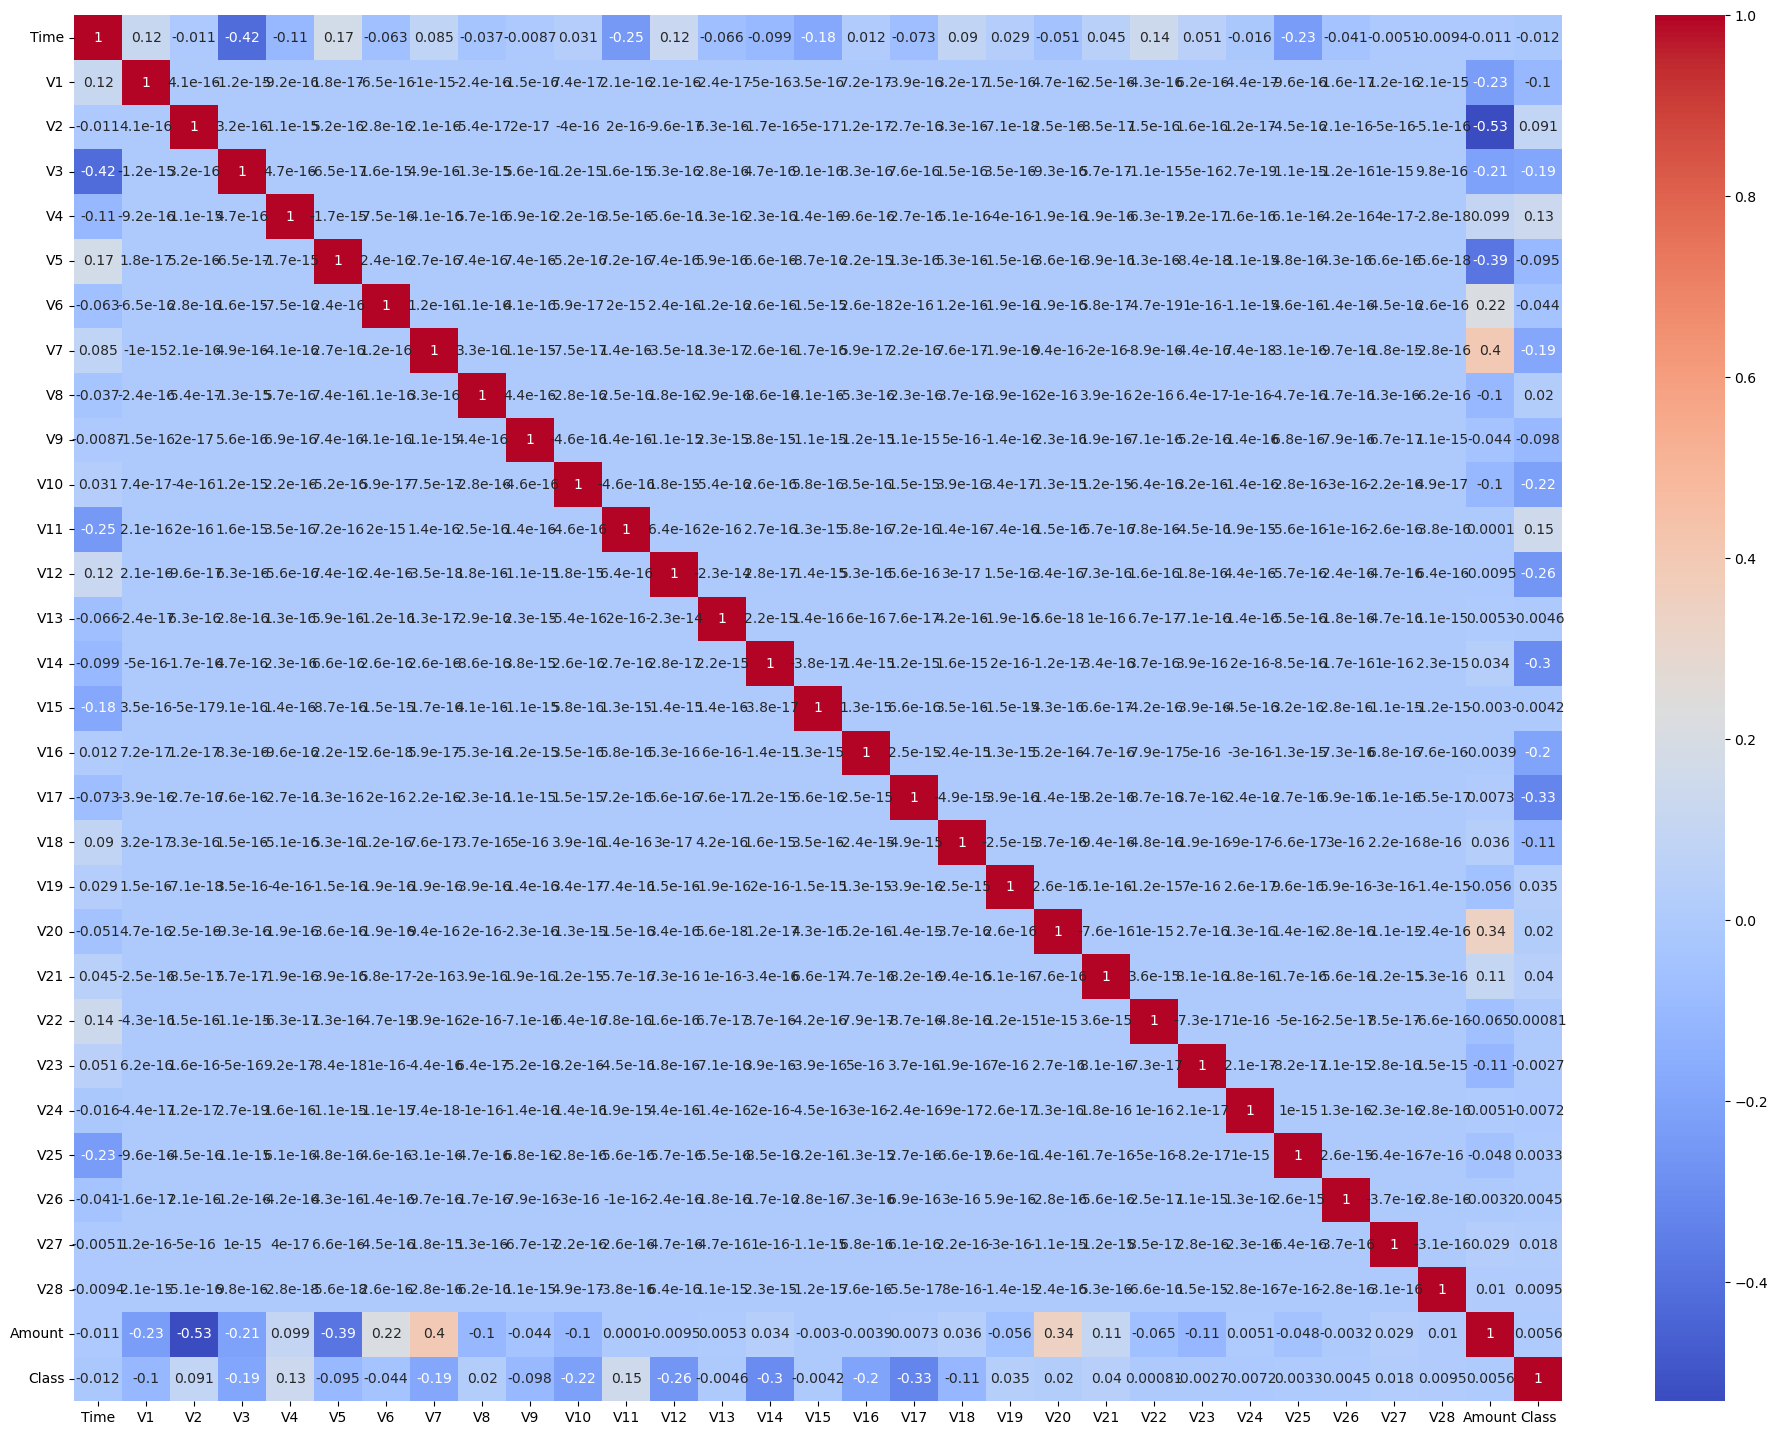

In [12]:
# checking the correlation in heatmap
plt.figure(figsize=(24,18))
sns.heatmap(corr,cmap="coolwarm",annot=True)
plt.show()

# splitting the dataset in train and test

In [13]:
y=df['Class']
x=df.drop(['Class'],axis=1)

In [14]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [15]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [16]:
#splitting the dataset using train test split
x_tain,x_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=0.20)

# plotting the distribution of a variable

In [17]:
# Acumulating all the column names under in variable 
cols=list(x.columns.values)

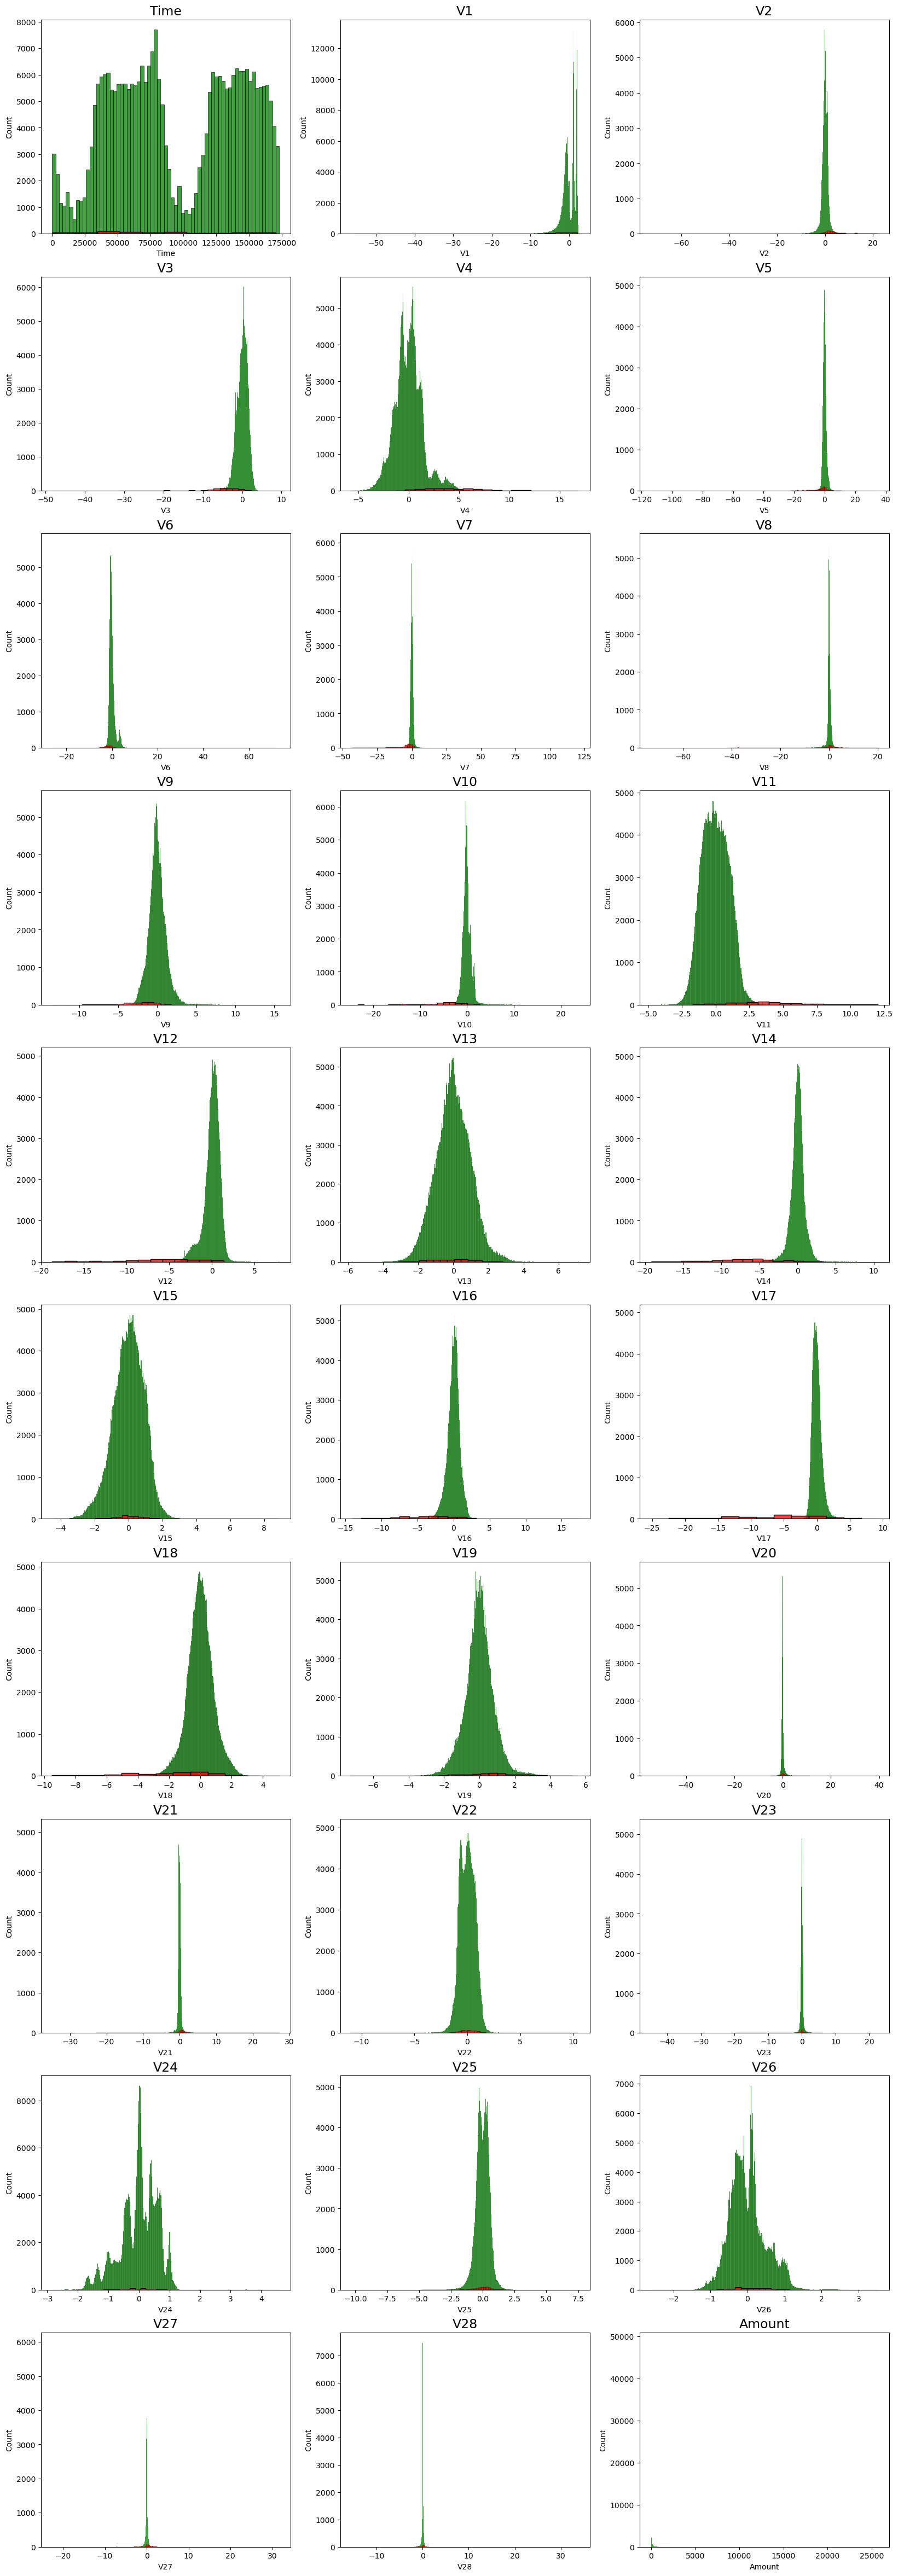

In [18]:
#plot the histo gram of a variable from the dataset to see the skewness
normal_records=df.Class==0
fraud_records=df.Class==1

plt.figure(figsize=(20,60))
for n ,col in enumerate (cols):
    plt.subplot(10,3,n+1)
    sns.histplot(x[col][normal_records],color='green')
    sns.histplot(x[col][fraud_records],color='red')
    plt.title(col,fontsize=17)
plt.show()    

# Model Building

In [19]:
# create a dataframe to store the result
from sklearn import linear_model
from sklearn.metrics import classification_report

df_res=pd.DataFrame(columns=['Mathodology','Model','Accuracy'])

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, pred_test):
    cm = confusion_matrix(y_test, pred_test)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
    category_names = ['Non-fraudulent', 'Fraudulent']
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ticks = np.arange(len(category_names))
    plt.xticks(ticks, category_names, rotation=45)
    plt.yticks(ticks, category_names)
    fmt = [['TN', 'FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(fmt[i][j]) + "=" + str(cm[i][j]), fontsize=12)
    plt.show()




# common function to fit and predict on a Logistic Regression model for both L1 and L2

In [21]:


def LogisticRegression(df_res, Methodology, x_train, y_train, x_test, y_test):
    num_c = list(np.power(10.0, np.arange(-10, 10)))
    cv_num = KFold(n_splits=10, shuffle=True, random_state=42)
    
    searchCV_l2 = linear_model.LogisticRegressionCV(
        Cs=num_c,
        penalty='l2',
        cv=cv_num,
        random_state=42,
        max_iter=10000,
        fit_intercept=True,
        solver='newton-cg',
        tol=1e-4
    )
    
    searchCV_l1 = linear_model.LogisticRegressionCV(
        Cs=num_c,
        penalty='l1',
        cv=cv_num,
        random_state=42,
        max_iter=10000,
        fit_intercept=True,
        solver='saga',  # 'saga' is required for L1 regularization
        tol=1e-4
    )

    searchCV_l1.fit(x_train, y_train)
    searchCV_l2.fit(x_train, y_train)
    
    print('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())
    print('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())

    print("Parameters for l1 regularization")
    print(searchCV_l1.coef_)
    print(searchCV_l1.intercept_)

    print("Parameters for l2 regularization")
    print(searchCV_l2.coef_)
    print(searchCV_l2.intercept_)

    # Predict values
    y_pred_l1 = searchCV_l1.predict(x_test)
    y_pred_l2 = searchCV_l2.predict(x_test)

    # Accuracy of L2/L1 models
    Accuracy_l2 = accuracy_score(y_true=y_test, y_pred=y_pred_l2)
    Accuracy_l1 = accuracy_score(y_true=y_test, y_pred=y_pred_l1)

    print("Accuracy of Logistic model with l1 regularization: {0}".format(Accuracy_l1))
    print("Confusion Matrix for L1 regularization")
    print(confusion_matrix(y_test, y_pred_l1))
    print("Classification Report for L1 regularization")
    print(classification_report(y_test, y_pred_l1))

    print("Accuracy of Logistic model with l2 regularization: {0}".format(Accuracy_l2))
    print("Confusion Matrix for L2 regularization")
    print(confusion_matrix(y_test, y_pred_l2))
    print("Classification Report for L2 regularization")
    print(classification_report(y_test, y_pred_l2))

    df_res = df_res.append(pd.DataFrame({'Methodology': Methodology, 'Model': 'Logistic Regression with L2 regularization', 'Accuracy': [Accuracy_l2]}))
    df_res = df_res.append(pd.DataFrame({'Methodology': Methodology, 'Model': 'Logistic Regression with L1 regularization', 'Accuracy': [Accuracy_l1]}))
    
    return df_res



In [22]:
def KNNModels(df_res,Methodology,x_train,y_train,x_test,y_test):
    knn=KNeighborsClassifier(n_neighbors=5,n_jobs=16)
    knn.fit(x_train,y_train)
    score=knn.score(x_test,y_test)
    print("model score")
    print(score)
    
    
    # Accuracy
    y_pred=knn.predict(x_test)
    KNN_Accuracy=metrics.accuracy_score(y_pred=y_pred,y_true=y_test)
    print("confusion matrix")
    plot_confusion_matrix(y_test,y_pred)
    print("classification Report")
    print(classification_report(y_test,y_pred))
    df_res = df_res.append(pd.DataFrame({'Methodology': [Methodology], 'Model': ['KNN'], 'Accuracy': [score]}), ignore_index=True)
    return df_res

In [23]:


def treeModels(df_res, Methodology, x_train, y_train, x_test, y_test):
    criteria = ['gini', 'entropy']
    scores = {}

    for criterion in criteria:
        dt = DecisionTreeClassifier(criterion=criterion, random_state=42)
        dt.fit(x_train, y_train)
        y_pred = dt.predict(x_test)
        
        score = dt.score(x_test, y_test)
        scores[criterion] = score
        
        print(f"Decision Tree with {criterion} criterion:")
        print(f"Accuracy: {score}")
        print("Confusion Matrix:")
        plot_confusion_matrix(y_test, y_pred)
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print('-'*60)
        
        df_res = df_res.append(pd.DataFrame({'Methodology': Methodology, 'Model': f'Decision Tree ({criterion})', 'Accuracy': score}, index=[0]))
    
    return df_res


In [24]:
#create a common function to fit and predict on a Random forest model
def RandomForest(df_res,Methodology,x_train,y_train,x_test,y_test):
    RF_model=RandomForestClassifier(n_estimators=100,bootstrap=True,max_features='sqrt',random_state=42)
    RF_model.fit(x_train,y_train)
    RF_test_score=RF_model.score(x_test,y_test)
    RF_model.predict(x_test)
    print('model Accuracy:{0}'.format(RF_test_score))
    
    rf_prediction=RF_model.predict(x_test)
    
    print("confusion matrix")
    plot_confusion_matrix(y_test,rf_prediction)
    print('Classification Report')
    print(classification_report(y_test,rf_prediction))
    df_res = df_res.append(pd.DataFrame({'Methodology': Methodology, 'Model': 'Random Forest', 'Accuracy': RF_test_score}, index=[0]))
    return df_res 
    
  

#  Perform cross validation with RepeatedKFold

In [25]:

from sklearn.model_selection import RepeatedKFold

# Creating dummy data for demonstration
np.random.seed(0)
x = pd.DataFrame(np.random.randn(100, 10))  # 100 samples, 10 features
y = pd.Series(np.random.randint(0, 2, size=100))  # Binary target variable

rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)

for train_index, test_index in rkf.split(x, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train_cv, x_test_cv = x.iloc[train_index], x.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    
   

TRAIN: [ 0  2  3  4  5  6  7 11 14 15 16 17 18 19 20 21 24 25 26 27 28 29 30 31
 33 34 36 37 38 39 40 41 42 43 44 45 46 47 51 53 54 55 56 58 59 60 61 62
 63 65 66 68 69 70 71 72 73 75 77 78 79 80 81 82 83 84 85 86 87 88 89 90
 92 93 94 95 96 97 98 99] TEST: [ 1  8  9 10 12 13 22 23 32 35 48 49 50 52 57 64 67 74 76 91]
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 16 17 18 20 21 22 23 24 25 26
 27 28 29 30 32 33 35 37 39 42 43 44 45 46 47 48 49 50 52 54 55 57 58 59
 60 61 63 64 65 67 68 70 71 72 73 74 76 78 79 80 81 82 83 84 85 86 87 88
 89 90 91 92 93 94 96 98] TEST: [ 4 15 19 31 34 36 38 40 41 51 53 56 62 66 69 75 77 95 97 99]
TRAIN: [ 1  3  4  6  7  8  9 10 12 13 15 16 18 19 21 22 23 24 25 28 29 30 31 32
 33 34 35 36 37 38 39 40 41 42 45 48 49 50 51 52 53 54 56 57 58 59 60 61
 62 64 65 66 67 68 69 70 71 73 74 75 76 77 80 82 83 84 85 86 87 88 90 91
 92 93 94 95 96 97 98 99] TEST: [ 0  2  5 11 14 17 20 26 27 43 44 46 47 55 63 72 78 79 81 89]
TRAIN: [ 0  1  2  3  4  5  7  8  9 10 11

Logistic Regression with L1 nad L2 regularization
Max auc_roc for l1: 0.5625
Max auc_roc for l2: 0.5625
Parameters for l1 regularization
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0.0623051]
Parameters for l2 regularization
[[ 1.65550747e-10  5.46275282e-11 -4.03735414e-10 -7.08017524e-10
   4.90473881e-10  3.73110201e-12  1.66504518e-10 -2.72133173e-10
  -1.10105496e-09  2.22321988e-10]]
[0.25131442]
Accuracy of Logistic model with l1 regularization: 0.6
Confusion Matrix for L1 regularization
[[ 0  8]
 [ 0 12]]
Classification Report for L1 regularization
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.60      1.00      0.75        12

    accuracy                           0.60        20
   macro avg       0.30      0.50      0.37        20
weighted avg       0.36      0.60      0.45        20

Accuracy of Logistic model with l2 regularization: 0.6
Confusion Matrix for L2 regularization
[[ 0  8]
 [ 0 12]]
Classi

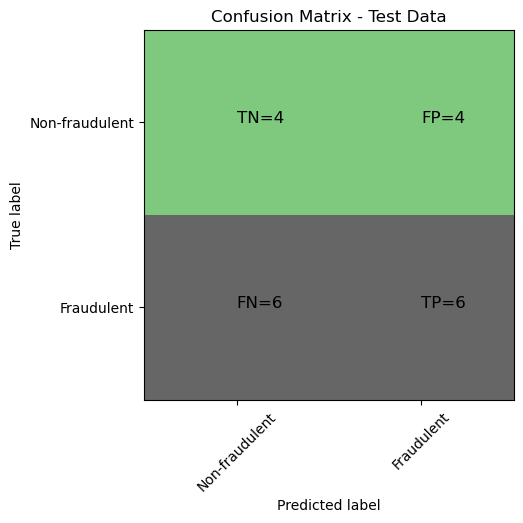

classification Report
              precision    recall  f1-score   support

           0       0.40      0.50      0.44         8
           1       0.60      0.50      0.55        12

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.49        20
weighted avg       0.52      0.50      0.51        20

Time taken bt model:---0.2982029914855957 seconds----
------------------------------------------------------------
Decision Model
Decision Tree with gini criterion:
Accuracy: 0.55
Confusion Matrix:


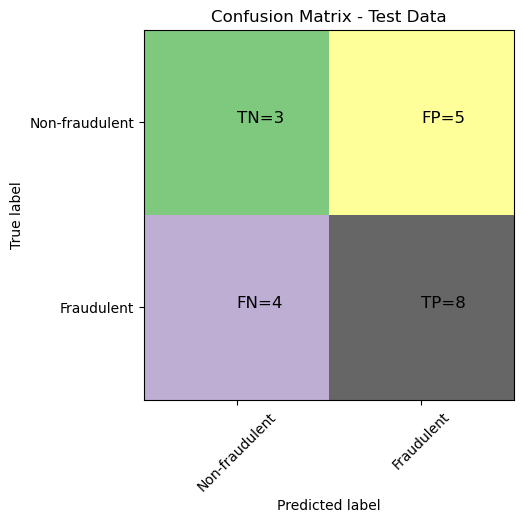

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.38      0.40         8
           1       0.62      0.67      0.64        12

    accuracy                           0.55        20
   macro avg       0.52      0.52      0.52        20
weighted avg       0.54      0.55      0.54        20

------------------------------------------------------------
Decision Tree with entropy criterion:
Accuracy: 0.55
Confusion Matrix:


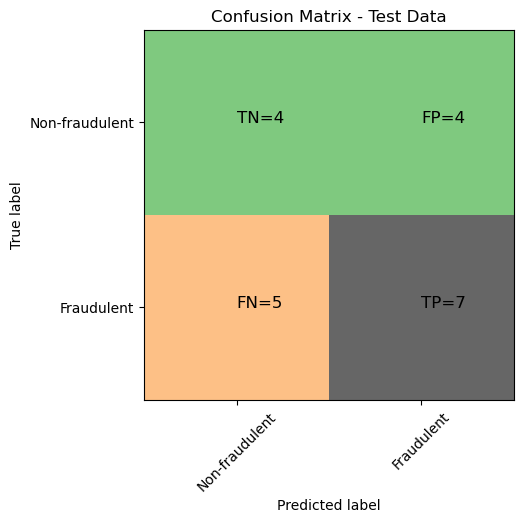

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.50      0.47         8
           1       0.64      0.58      0.61        12

    accuracy                           0.55        20
   macro avg       0.54      0.54      0.54        20
weighted avg       0.56      0.55      0.55        20

------------------------------------------------------------
Time taken bt model:---0.304262638092041 seconds----
------------------------------------------------------------
Decision Model
model Accuracy:0.6
confusion matrix


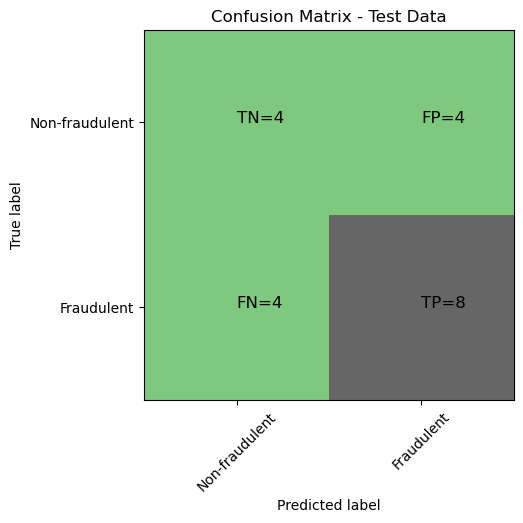

Classification Report
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         8
           1       0.67      0.67      0.67        12

    accuracy                           0.60        20
   macro avg       0.58      0.58      0.58        20
weighted avg       0.60      0.60      0.60        20

Time taken bt model:---0.3092069625854492 seconds----
------------------------------------------------------------


In [26]:

#Run Logistic Regression with L1 nad L2 Regularization
print("Logistic Regression with L1 nad L2 regularization")
start_time=time.time()
df_res=LogisticRegression(df_res," RepeatedKFold cross Validation",x_train_cv,y_train_cv,x_test_cv,y_test_cv)
print("Time taken bt model:---%s seconds----"%(time.time()-start_time))
print('-'*60)

# Run KNN Model
print("KNN Model")
start_time=time.time()
df_res=KNNModels(df_res," RepeatedKFold cross Validation",x_train_cv,y_train_cv,x_test_cv,y_test_cv)
print("Time taken bt model:---%s seconds----"%(time.time()-start_time))
print('-'*60)




#Run Decision Tree Model with'gini' and entropy criteria
print("Decision Model")
start_time=time.time()
df_res=treeModels(df_res," RepeatedKFold cross Validation",x_train_cv,y_train_cv,x_test_cv,y_test_cv)
print("Time taken bt model:---%s seconds----"%(time.time()-start_time))
print('-'*60)

# Run Random Forest
print("Decision Model")
start_time=time.time()
df_res=RandomForest(df_res," RepeatedKFold cross Validation",x_train_cv,y_train_cv,x_test_cv,y_test_cv)
print("Time taken bt model:---%s seconds----"%(time.time()-start_time))
print('-'*60)
